In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE


In [2]:
df = pd.read_csv('/home/ichigo/Desktop/Medical diagnosis uisng AI/Diseases_dataset/Chronic_Kidney_Dsease_data.csv')

In [3]:
df.head()

,PatientID,Age,Gender,Ethnicity,SocioeconomicStatus,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,...,Itching,QualityOfLifeScore,HeavyMetalsExposure,OccupationalExposureChemicals,WaterQuality,MedicalCheckupsFrequency,MedicationAdherence,HealthLiteracy,Diagnosis,DoctorInCharge
0,1,71,0,0,0,2,31.069414,1,5.128112,1.676220,...,7.556302,76.076800,0,0,1,1.018824,4.966808,9.871449,1,Confidential
1,2,34,0,0,1,3,29.692119,1,18.609552,8.377574,...,6.836766,40.128498,0,0,0,3.923538,8.189275,7.161765,1,Confidential
2,3,80,1,1,0,1,37.394822,1,11.882429,9.607401,...,2.144722,92.872842,0,1,1,1.429906,7.624028,7.354632,1,Confidential
3,4,40,0,2,0,1,31.329680,0,16.020165,0.408871,...,7.077188,90.080321,0,0,0,3.226416,3.282688,6.629587,1,Confidential
4,5,43,0,1,1,2,23.726311,0,7.944146,0.780319,...,3.553118,5.258372,0,0,1,0.285466,3.849498,1.437385,1,Confidential


In [4]:
df.tail()

,PatientID,Age,Gender,Ethnicity,SocioeconomicStatus,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,...,Itching,QualityOfLifeScore,HeavyMetalsExposure,OccupationalExposureChemicals,WaterQuality,MedicalCheckupsFrequency,MedicationAdherence,HealthLiteracy,Diagnosis,DoctorInCharge
1654,1655,90,0,0,1,2,39.677059,1,1.370151,4.157954,...,2.138976,81.102765,0,0,0,0.951836,9.547583,2.046212,0,Confidential
1655,1656,34,0,0,2,1,28.922015,0,3.372073,9.647525,...,7.911566,10.600428,0,1,0,3.604147,1.609847,0.324417,0,Confidential
1656,1657,84,0,0,2,3,21.951219,0,15.825955,7.349964,...,0.015531,69.633427,0,0,0,0.801955,5.768617,4.935108,0,Confidential
1657,1658,90,0,0,2,2,24.964149,0,12.967462,0.618614,...,3.432765,31.858023,0,0,0,0.560298,2.744519,0.322592,1,Confidential
1658,1659,34,1,1,0,0,19.253258,1,11.396510,7.446314,...,9.293499,82.314878,0,0,0,1.754852,0.186400,4.553608,1,Confidential


In [5]:
col_drop = ['PatientID','DoctorInCharge']
df = df.drop(columns=col_drop)

In [6]:
df

,Age,Gender,Ethnicity,SocioeconomicStatus,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,MuscleCramps,Itching,QualityOfLifeScore,HeavyMetalsExposure,OccupationalExposureChemicals,WaterQuality,MedicalCheckupsFrequency,MedicationAdherence,HealthLiteracy,Diagnosis
0,71,0,0,0,2,31.069414,1,5.128112,1.676220,0.240386,...,4.518513,7.556302,76.076800,0,0,1,1.018824,4.966808,9.871449,1
1,34,0,0,1,3,29.692119,1,18.609552,8.377574,6.503233,...,2.202222,6.836766,40.128498,0,0,0,3.923538,8.189275,7.161765,1
2,80,1,1,0,1,37.394822,1,11.882429,9.607401,2.104828,...,5.967271,2.144722,92.872842,0,1,1,1.429906,7.624028,7.354632,1
3,40,0,2,0,1,31.329680,0,16.020165,0.408871,6.964422,...,2.176387,7.077188,90.080321,0,0,0,3.226416,3.282688,6.629587,1
4,43,0,1,1,2,23.726311,0,7.944146,0.780319,3.097796,...,6.800993,3.553118,5.258372,0,0,1,0.285466,3.849498,1.437385,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1654,90,0,0,1,2,39.677059,1,1.370151,4.157954,8.602873,...,6.972093,2.138976,81.102765,0,0,0,0.951836,9.547583,2.046212,0
1655,34,0,0,2,1,28.922015,0,3.372073,9.647525,9.836919,...,0.465297,7.911566,10.600428,0,1,0,3.604147,1.609847,0.324417,0
1656,84,0,0,2,3,21.951219,0,15.825955,7.349964,5.038194,...,2.281970,0.015531,69.633427,0,0,0,0.801955,5.768617,4.935108,0
1657,90,0,0,2,2,24.964149,0,12.967462,0.618614,4.557577,...,0.257814,3.432765,31.858023,0,0,0,0.560298,2.744519,0.322592,1


In [7]:
print(df.isna().sum())

Age                              0
Gender                           0
Ethnicity                        0
SocioeconomicStatus              0
EducationLevel                   0
BMI                              0
Smoking                          0
AlcoholConsumption               0
PhysicalActivity                 0
DietQuality                      0
SleepQuality                     0
FamilyHistoryKidneyDisease       0
FamilyHistoryHypertension        0
FamilyHistoryDiabetes            0
PreviousAcuteKidneyInjury        0
UrinaryTractInfections           0
SystolicBP                       0
DiastolicBP                      0
FastingBloodSugar                0
HbA1c                            0
SerumCreatinine                  0
BUNLevels                        0
GFR                              0
ProteinInUrine                   0
ACR                              0
SerumElectrolytesSodium          0
SerumElectrolytesPotassium       0
SerumElectrolytesCalcium         0
SerumElectrolytesPho

In [9]:

# Class distribution visualization
plt.figure(figsize=(6, 4))
sns.countplot(x=df['class'], palette='viridis')
plt.title("Class Distribution")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

KeyError: 'class'

<Figure size 600x400 with 0 Axes>

In [10]:
df.columns

Index(['Age', 'Gender', 'Ethnicity', 'SocioeconomicStatus', 'EducationLevel',
       'BMI', 'Smoking', 'AlcoholConsumption', 'PhysicalActivity',
       'DietQuality', 'SleepQuality', 'FamilyHistoryKidneyDisease',
       'FamilyHistoryHypertension', 'FamilyHistoryDiabetes',
       'PreviousAcuteKidneyInjury', 'UrinaryTractInfections', 'SystolicBP',
       'DiastolicBP', 'FastingBloodSugar', 'HbA1c', 'SerumCreatinine',
       'BUNLevels', 'GFR', 'ProteinInUrine', 'ACR', 'SerumElectrolytesSodium',
       'SerumElectrolytesPotassium', 'SerumElectrolytesCalcium',
       'SerumElectrolytesPhosphorus', 'HemoglobinLevels', 'CholesterolTotal',
       'CholesterolLDL', 'CholesterolHDL', 'CholesterolTriglycerides',
       'ACEInhibitors', 'Diuretics', 'NSAIDsUse', 'Statins',
       'AntidiabeticMedications', 'Edema', 'FatigueLevels', 'NauseaVomiting',
       'MuscleCramps', 'Itching', 'QualityOfLifeScore', 'HeavyMetalsExposure',
       'OccupationalExposureChemicals', 'WaterQuality',
       'Medi

In [11]:
import pandas as pd

# Load the dataset
file_path = "/home/ichigo/Desktop/Medical diagnosis uisng AI/Diseases_dataset/Chronic_Kidney_Dsease_data.csv"
df = pd.read_csv(file_path)

# Display basic information about the dataset
df.info(), df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1659 entries, 0 to 1658
Data columns (total 54 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   PatientID                      1659 non-null   int64  
 1   Age                            1659 non-null   int64  
 2   Gender                         1659 non-null   int64  
 3   Ethnicity                      1659 non-null   int64  
 4   SocioeconomicStatus            1659 non-null   int64  
 5   EducationLevel                 1659 non-null   int64  
 6   BMI                            1659 non-null   float64
 7   Smoking                        1659 non-null   int64  
 8   AlcoholConsumption             1659 non-null   float64
 9   PhysicalActivity               1659 non-null   float64
 10  DietQuality                    1659 non-null   float64
 11  SleepQuality                   1659 non-null   float64
 12  FamilyHistoryKidneyDisease     1659 non-null   i

(None,
    PatientID  Age  Gender  Ethnicity  SocioeconomicStatus  EducationLevel  \
 0          1   71       0          0                    0               2   
 1          2   34       0          0                    1               3   
 2          3   80       1          1                    0               1   
 3          4   40       0          2                    0               1   
 4          5   43       0          1                    1               2   
 
          BMI  Smoking  AlcoholConsumption  PhysicalActivity  ...   Itching  \
 0  31.069414        1            5.128112          1.676220  ...  7.556302   
 1  29.692119        1           18.609552          8.377574  ...  6.836766   
 2  37.394822        1           11.882429          9.607401  ...  2.144722   
 3  31.329680        0           16.020165          0.408871  ...  7.077188   
 4  23.726311        0            7.944146          0.780319  ...  3.553118   
 
    QualityOfLifeScore  HeavyMetalsExposure  Oc

/tmp/ipykernel_581574/4040293240.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df_cleaned["Diagnosis"], palette="coolwarm")


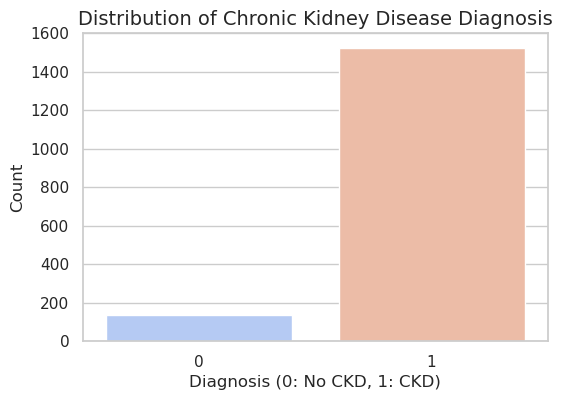

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Drop unnecessary columns
df_cleaned = df.drop(columns=["PatientID", "DoctorInCharge"])

# Set up visualization style
sns.set(style="whitegrid")

# Plot the distribution of the target variable (Diagnosis)
plt.figure(figsize=(6, 4))
sns.countplot(x=df_cleaned["Diagnosis"], palette="coolwarm")
plt.title("Distribution of Chronic Kidney Disease Diagnosis", fontsize=14)
plt.xlabel("Diagnosis (0: No CKD, 1: CKD)", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.show()


In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [14]:
# Define features and target variable
X = df_cleaned.drop(columns=["Diagnosis"])
y = df_cleaned["Diagnosis"]

In [15]:
# Split data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [16]:
# Standardize numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [17]:
# Train XGBoost model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=42)
xgb_model.fit(X_train, y_train)

/home/ichigo/.local/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [22:40:58] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [18]:
# Predictions
y_pred = xgb_model.predict(X_test)

In [19]:
# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

accuracy, conf_matrix, class_report

(0.9216867469879518,
 array([[  6,  21],
        [  5, 300]]),
 '              precision    recall  f1-score   support\n\n           0       0.55      0.22      0.32        27\n           1       0.93      0.98      0.96       305\n\n    accuracy                           0.92       332\n   macro avg       0.74      0.60      0.64       332\nweighted avg       0.90      0.92      0.91       332\n')

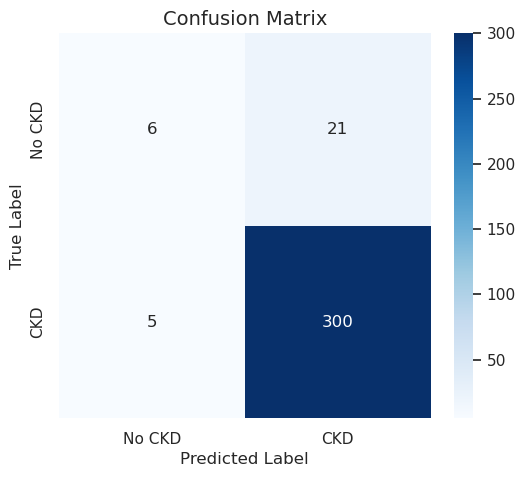

In [20]:
# Plot confusion matrix heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["No CKD", "CKD"], yticklabels=["No CKD", "CKD"])
plt.xlabel("Predicted Label", fontsize=12)
plt.ylabel("True Label", fontsize=12)
plt.title("Confusion Matrix", fontsize=14)
plt.show()

In [21]:
# Feature importance plot
plt.figure(figsize=(10, 6))
importances = xgb_model.feature_importances_
features = df_cleaned.drop(columns=["Diagnosis"]).columns

<Figure size 1000x600 with 0 Axes>

/tmp/ipykernel_581574/3230207629.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances, y=features, palette="coolwarm")


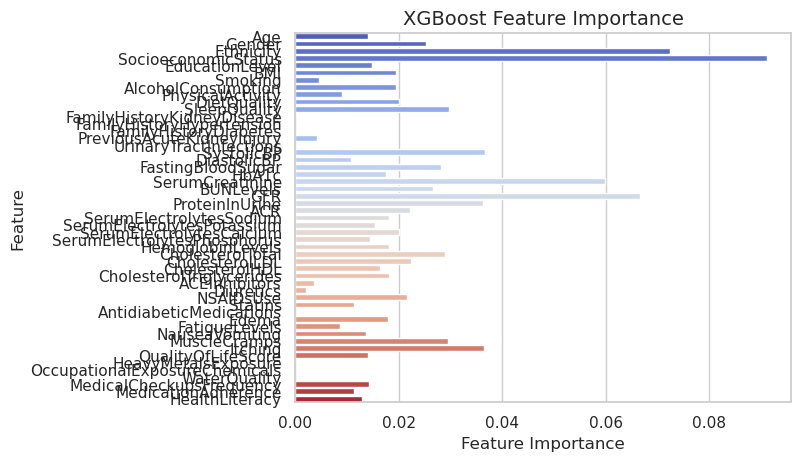

In [22]:
sns.barplot(x=importances, y=features, palette="coolwarm")
plt.xlabel("Feature Importance", fontsize=12)
plt.ylabel("Feature", fontsize=12)
plt.title("XGBoost Feature Importance", fontsize=14)
plt.show()

In [23]:
df.columns

Index(['PatientID', 'Age', 'Gender', 'Ethnicity', 'SocioeconomicStatus',
       'EducationLevel', 'BMI', 'Smoking', 'AlcoholConsumption',
       'PhysicalActivity', 'DietQuality', 'SleepQuality',
       'FamilyHistoryKidneyDisease', 'FamilyHistoryHypertension',
       'FamilyHistoryDiabetes', 'PreviousAcuteKidneyInjury',
       'UrinaryTractInfections', 'SystolicBP', 'DiastolicBP',
       'FastingBloodSugar', 'HbA1c', 'SerumCreatinine', 'BUNLevels', 'GFR',
       'ProteinInUrine', 'ACR', 'SerumElectrolytesSodium',
       'SerumElectrolytesPotassium', 'SerumElectrolytesCalcium',
       'SerumElectrolytesPhosphorus', 'HemoglobinLevels', 'CholesterolTotal',
       'CholesterolLDL', 'CholesterolHDL', 'CholesterolTriglycerides',
       'ACEInhibitors', 'Diuretics', 'NSAIDsUse', 'Statins',
       'AntidiabeticMedications', 'Edema', 'FatigueLevels', 'NauseaVomiting',
       'MuscleCramps', 'Itching', 'QualityOfLifeScore', 'HeavyMetalsExposure',
       'OccupationalExposureChemicals', 'WaterQu

In [ ]:
#import streamlit as st
import joblib
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load the trained model
model = joblib.load('random_forest_kidney_model.pkl')

# Function to preprocess input data
def preprocess_input(data):
    # Create a DataFrame from the input data
    df = pd.DataFrame([data])
    
    # Scale the features using the same scaler used during training
    scaler = StandardScaler()
    df_scaled = scaler.fit_transform(df)
    
    return df_scaled

# Streamlit app
st.title("Kidney Disease Prediction App")
st.write("Enter the following features to predict your risk of kidney disease:")

# Input fields for user to enter feature values
age = st.number_input("Age", min_value=0, max_value=120, value=30)
gender = st.selectbox("Gender", ["Male", "Female"])
bmi = st.number_input("BMI", min_value=0.0, max_value=70.0, value=25.0)
family_history_kidney = st.selectbox("Family History of Kidney Disease", ["No", "Yes"])
family_history_hypertension = st.selectbox("Family History of Hypertension", ["No", "Yes"])
family_history_diabetes = st.selectbox("Family History of Diabetes", ["No", "Yes"])
previous_kidney_injury = st.selectbox("Previous Acute Kidney Injury", ["No", "Yes"])
smoking = st.selectbox("Smoking", ["No", "Yes"])
alcohol_consumption = st.selectbox("Alcohol Consumption", ["No", "Yes"])
physical_activity = st.selectbox("Physical Activity", ["Low", "Moderate", "High"])
diet_quality = st.selectbox("Diet Quality", ["Poor", "Average", "Good"])
sleep_quality = st.selectbox("Sleep Quality", ["Poor", "Average", "Good"])
systolic_bp = st.number_input("Systolic Blood Pressure", min_value=0, max_value=300, value=120)
diastolic_bp = st.number_input("Diastolic Blood Pressure", min_value=0, max_value=200, value=80)
fasting_blood_sugar = st.number_input("Fasting Blood Sugar", min_value=0, max_value=300, value=100)
hba1c = st.number_input("HbA1c", min_value=0.0, max_value=20.0, value=5.0)
ace_inhibitors = st.selectbox("ACE Inhibitors", ["No", "Yes"])
diuretics = st.selectbox("Diuretics", ["No", "Yes"])
nsaids_use = st.selectbox("NSAIDs Use", ["No", "Yes"])
statins = st.selectbox("Statins", ["No", "Yes"])
antidiabetic_medications = st.selectbox("Antidiabetic Medications", ["No", "Yes"])
edema = st.selectbox("Edema", ["No", "Yes"])
fatigue_levels = st.selectbox("Fatigue Levels", ["Low", "Moderate", "High"])
nausea_vomiting = st.selectbox("Nausea/Vomiting", ["No", "Yes"])
muscle_cramps = st.selectbox("Muscle Cramps", ["No", "Yes"])
itching = st.selectbox("Itching", ["No", "Yes"])

# Create a dictionary of input data
input_data = {
    'Age': age,
    'Gender': 1 if gender == "Male" else 0,
    'BMI': bmi,
    'FamilyHistoryKidneyDisease': 1 if family_history_kidney == "Yes" else 0,
    'FamilyHistoryHypertension': 1 if family_history_hypertension == "Yes" else 0,
    'FamilyHistoryDiabetes': 1 if family_history_diabetes == "Yes" else 0,
    'PreviousAcuteKidneyInjury': 1 if previous_kidney_injury == "Yes" else 0,
    'Smoking': 1 if smoking == "Yes" else 0,
    'AlcoholConsumption': 1 if alcohol_consumption == "Yes" else 0,
    'PhysicalActivity': 0 if physical_activity == "Low" else 1 if physical_activity == "Moderate" else 2,
    'DietQuality': 0 if diet_quality == "Poor" else 1 if diet_quality == "Average" else 2,
    'SleepQuality': 0 if sleep_quality == "Poor" else 1 if sleep_quality == "Average" else 2,
    'SystolicBP': systolic_bp,
    'DiastolicBP': diastolic_bp,
    'FastingBloodSugar': fasting_blood_sugar,
    'HbA1c': hba1c,
    'ACEInhibitors': 1 if ace_inhibitors == "Yes" else 0,
    'Diuretics': 1 if diuretics == "Yes" else 0,
    'NSAIDsUse': 1 if nsaids_use == "Yes" else 0,
    'Statins': 1 if statins == "Yes" else 0,
    'AntidiabeticMedications': 1 if antidiabetic_medications == "Yes" else 0,
    'Edema': 1 if edema == "Yes" else 0,
    'FatigueLevels': 0 if fatigue_levels == "Low" else 1 if fatigue_levels == "Moderate" else 2,
    'NauseaVomiting': 1 if nausea_vomiting == "Yes" else 0,
    'MuscleCramps': 1 if muscle_cramps == "Yes" else 0,
    'Itching': 1 if itching == "Yes" else 0
}

# Preprocess the input data
input_scaled = preprocess_input(input_data)

# Predict button
if st.button("Predict"):
    # Make prediction
    prediction = model.predict(input_scaled)
    prediction_proba = model.predict_proba(input_scaled)
    
    # Display the result
    if prediction[0] == 1:
        st.error("The model predicts that you **are at risk of kidney disease**.")
    else:
        st.success("The model predicts that you **are not at risk of kidney disease**.")
    
    # Show prediction probability
    st.write(f"Prediction Probability: {prediction_proba[0][1]:.2f} (for kidney disease)")